In [278]:
import pandas as pd
import numpy as np

%matplotlib inline
pd.set_option("display.max_columns", None)

In [279]:
dftrain = pd.read_csv("../train.csv")

In [280]:
def eda(dataframe):
    temp_maxrows = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", None)
    print("missing values \n", dataframe.isnull().sum())
    print("dataframe index \n", dataframe.index)
    print("dataframe types \n", dataframe.dtypes)
    print("dataframe shape \n", dataframe.shape)
    print("dataframe describe \n", dataframe.describe())
    print("dataframe duplicates \n", dataframe.duplicated().sum()) 
    for item in dataframe:
        print(item)
        print(dataframe[item].nunique())
    pd.set_option("display.max_rows", temp_maxrows)
        
eda(dftrain)

missing values 
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF       

In [281]:
def eda_helper(df):
    temp_maxrows = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", None)
    dict_list = []
    for col in df.columns:
        data = df[col]
        dict_ = {}
        dict_.update({"null_count" : data.isnull().sum()})
        dict_.update({"unique_count" : len(data.unique())})
        dict_.update({"data_type" : set([type(d).__name__ for d in data])})
        dict_list.append(dict_)
    eda_df = pd.DataFrame(dict_list)
    eda_df.index = df.columns
    eda_df = eda_df.sort_values(['null_count','unique_count'], ascending=[True, False])
    return eda_df
    pd.set_option("display.max_rows", temp_maxrows)

eda_helper(dftrain)

,null_count,unique_count,data_type
Id,0,1460,{int}
LotArea,0,1073,{int}
GrLivArea,0,861,{int}
BsmtUnfSF,0,780,{int}
1stFlrSF,0,753,{int}
TotalBsmtSF,0,721,{int}
SalePrice,0,663,{int}
BsmtFinSF1,0,637,{int}
GarageArea,0,441,{int}
2ndFlrSF,0,417,{int}


In [282]:
""" Transforming and cleaning up the data"""

#Coding the ranked qualitative response into a quantitative, aka A,B,C become 3,2,1
scale_from_6 = sorted(list(range(6)), reverse=True)
rating_from_top = ['Ex','Gd','TA','Fa','Po', np.nan]
vars_to_scale = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
                'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for i in vars_to_scale:
    dftrain[i].replace(rating_from_top, scale_from_6, inplace=True)


### BsmtExposure : Refers to walkout or garden level walls ###
#Coding rating to numeric
dftrain.BsmtExposure.replace(['Gd','Av','Mn','No', np.nan], [4, 3, 2, 1, 0], inplace=True)


### CentrailAir : Central air conditioning ###
#Converting to logistical response
dftrain.CentralAir.replace(['Y','N'], [1,0], inplace=True)


### Electrical : Electrical system ###
#Coding quality of electrical system on a scale. Potential introduction of error. Consider using dummies instead
dftrain.Electrical.replace(['SBrkr','FuseA','FuseF','FuseP','Mix'], [4, 3, 2, 1, 0], inplace=True)


### Functional : Home functionality (Assume typical unless deductions are warranted)  ###
#Coding to numeric scale, with 0 being normal and increasing as functionality worsens
dftrain.Functional.replace(['Sal', 'Sev', 'Maj2', 'Maj1','Mod','Min2','Min1','Typ'], 
                           [7, 6, 5, 4, 3, 2, 1, 0], inplace=True)


#Dropping columns with too many missing or null values, as well as the ID since it carries no insights
dftrain = dftrain.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Utilities', 'Id'], axis=1)

#Dropping columns with very high heterogeneity in responses
dftrain.drop(['Street', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
              'SaleType', 'SaleCondition', 'LowQualFinSF', 'BsmtFinType2', 'BsmtUnfSF',
             'Heating', 'RoofMatl', 'Condition2', 'MasVnrArea', 'Functional', 'BsmtFinSF2', 
              'CentralAir', 'Electrical', 'BsmtHalfBath'], axis=1, inplace=True)   

#Dropping entries for commercial properties, the top 4 outliers based on the distribution 
#of GrLivArea, and resetting index for analysis
index_todrop = dftrain.loc[dftrain.MSZoning == 'C (all)'].index
index_todrop = index_todrop.append(dftrain.loc[dftrain.GrLivArea >= 4000].index)
index_todrop = index_todrop.append(dftrain.loc[dftrain.LotFrontage >= 200].index)

dftrain.drop(index_todrop, inplace=True)

In [283]:
# Creating a simple imputer to put the mean value into the ~200 entries missing LotFrontage data. 
# Consider dropping those entries altogether
from sklearn.impute import SimpleImputer

impmean = SimpleImputer(missing_values = np.nan,
                  strategy = "mean") 

dfnums = dftrain[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
                 '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
                 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 
                 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 
                 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 
                 'YrSold', 'SalePrice']]

impmean.fit(dfnums) 
dfmeanimps = impmean.transform(dfnums)
dftrain.LotFrontage = dfmeanimps[:,0]


dftrain.dropna(inplace=True)
dftrain.reset_index(drop=True, inplace=True)

In [284]:
#Prepping the df for visualizations
import seaborn as sns
from matplotlib import pyplot as plt

dfviz = dftrain

In [285]:
# #Coding the ranked qualitative response into a ordered categories
# rating = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

# dfviz_to_rate = ['LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
#               'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

# for i in dfviz_to_rate:
#     dfviz[i] = pd.Categorical(dfviz[i], categories = rating, ordered = True)

# #Manually doing the same for dfviz.Functional, LandSlope and MSSubClass
# # dfviz.Functional = pd.Categorical(dfviz.Functional, categories =['Typ', 'Min1', 'Min2','Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], ordered=True)
# dfviz.LandSlope = pd.Categorical(dfviz.LandSlope, categories = ['Gtl', 'Mod', 'Sev'], ordered=True)
# dfviz.MSSubClass = dfviz.MSSubClass.astype('category')


In [286]:
to_plot = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
            'ExterQual' , 'ExterCond' , 'BsmtQual' , 'BsmtCond', 'BsmtExposure', 
           'BsmtFinSF1','TotalBsmtSF', 'HeatingQC',
           '1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFullBath', 'FullBath', 
           'HalfBath' , 'BedroomAbvGr' ,'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
           'GarageQual', 'WoodDeckSF' , 'OpenPorchSF', 'EnclosedPorch' , 'MoSold' ,'YrSold' , 
           'SalePrice']

<ipython-input-287-724fde7370c3>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

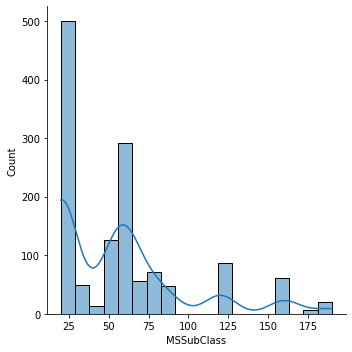

<Figure size 432x288 with 0 Axes>

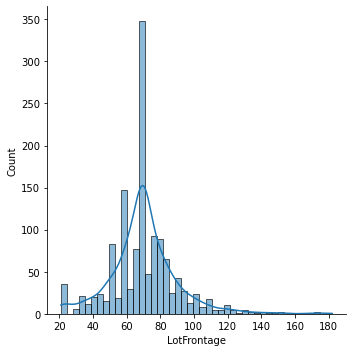

<Figure size 432x288 with 0 Axes>

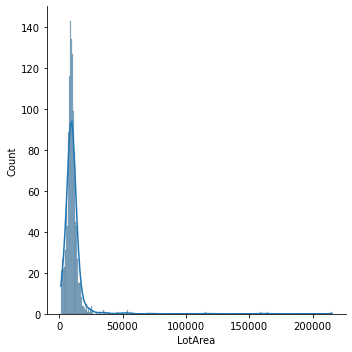

<Figure size 432x288 with 0 Axes>

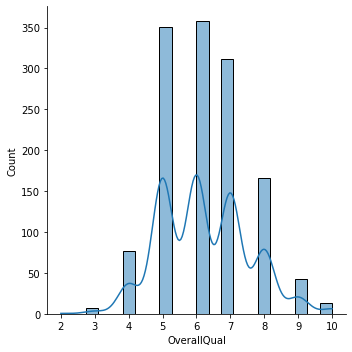

<Figure size 432x288 with 0 Axes>

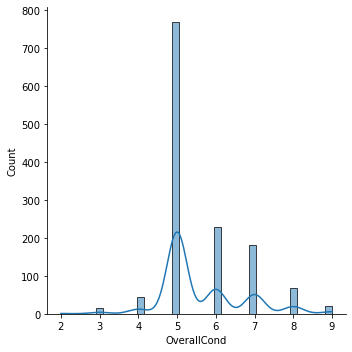

<Figure size 432x288 with 0 Axes>

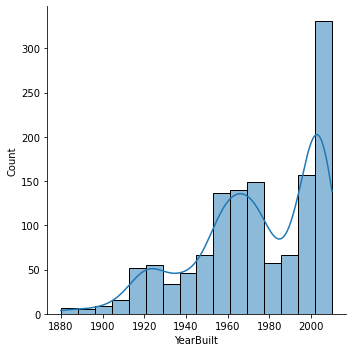

<Figure size 432x288 with 0 Axes>

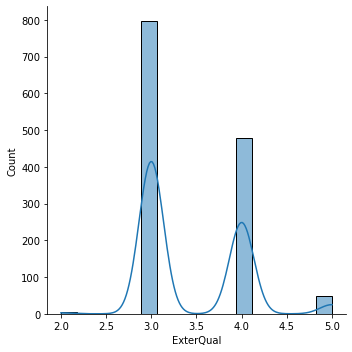

<Figure size 432x288 with 0 Axes>

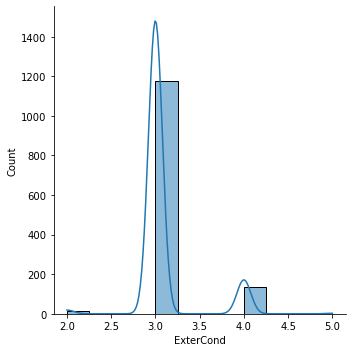

<Figure size 432x288 with 0 Axes>

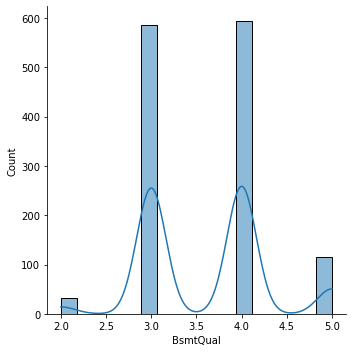

<Figure size 432x288 with 0 Axes>

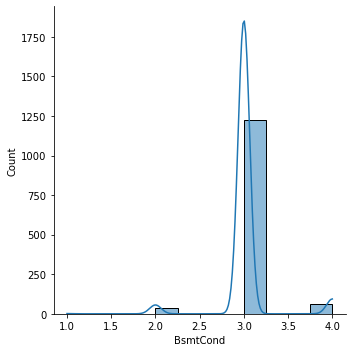

<Figure size 432x288 with 0 Axes>

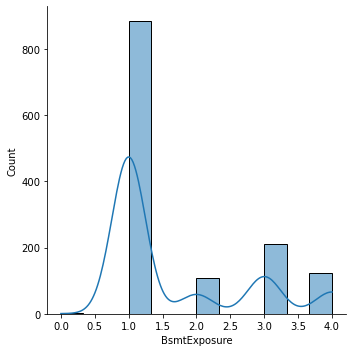

<Figure size 432x288 with 0 Axes>

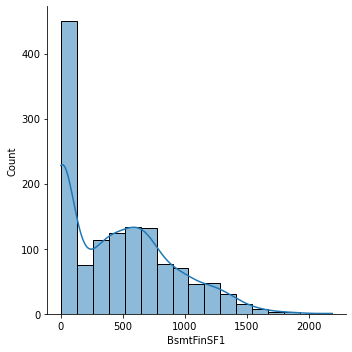

<Figure size 432x288 with 0 Axes>

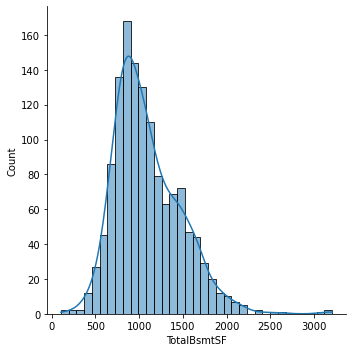

<Figure size 432x288 with 0 Axes>

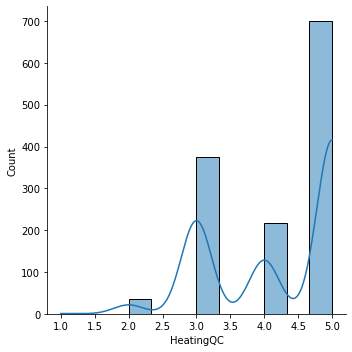

<Figure size 432x288 with 0 Axes>

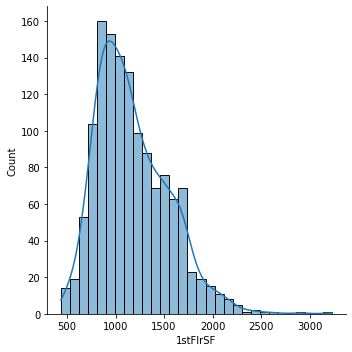

<Figure size 432x288 with 0 Axes>

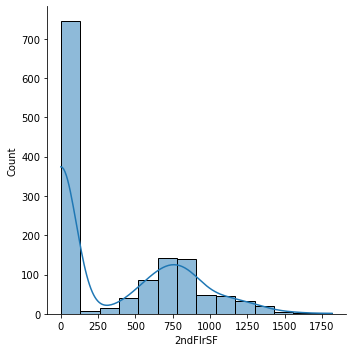

<Figure size 432x288 with 0 Axes>

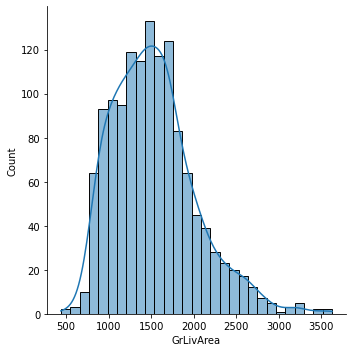

<Figure size 432x288 with 0 Axes>

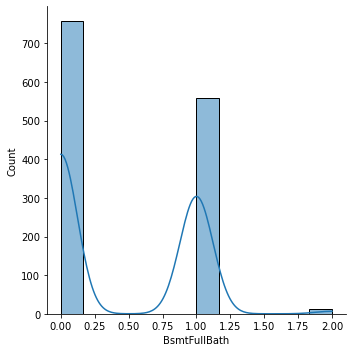

<Figure size 432x288 with 0 Axes>

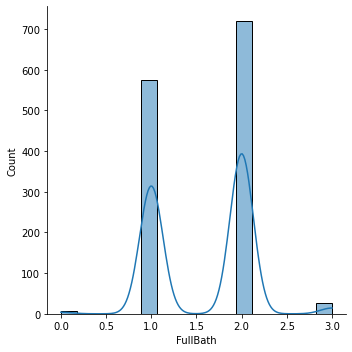

<Figure size 432x288 with 0 Axes>

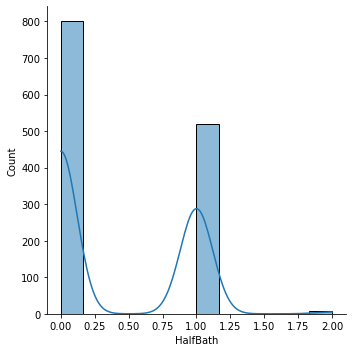

<Figure size 432x288 with 0 Axes>

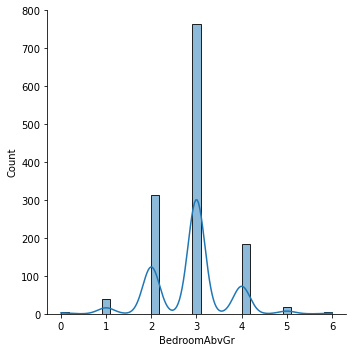

<Figure size 432x288 with 0 Axes>

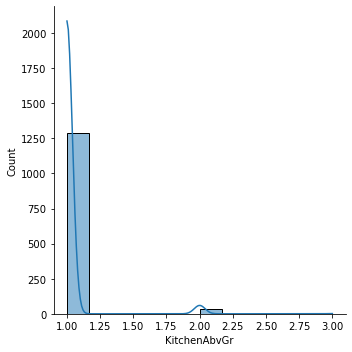

<Figure size 432x288 with 0 Axes>

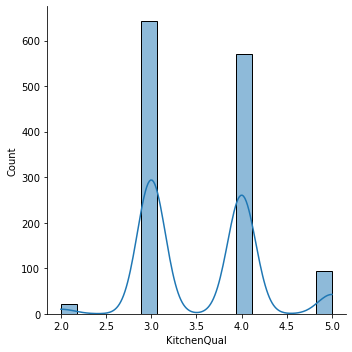

<Figure size 432x288 with 0 Axes>

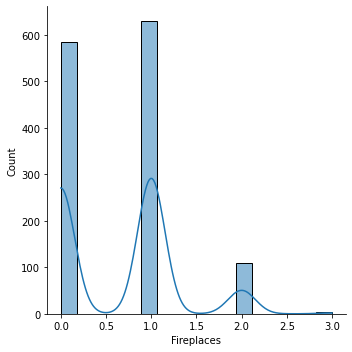

<Figure size 432x288 with 0 Axes>

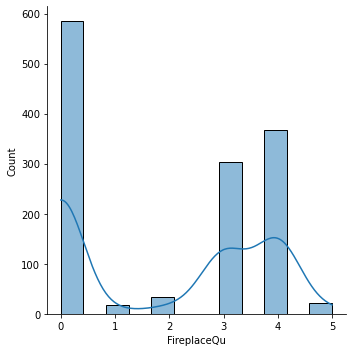

<Figure size 432x288 with 0 Axes>

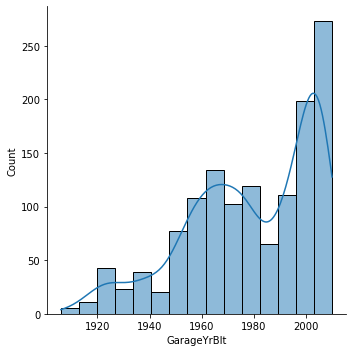

<Figure size 432x288 with 0 Axes>

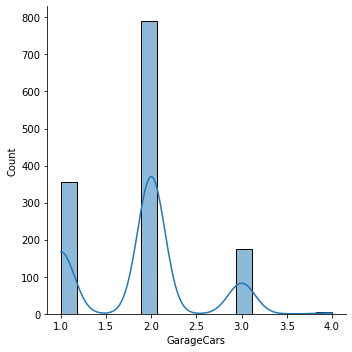

<Figure size 432x288 with 0 Axes>

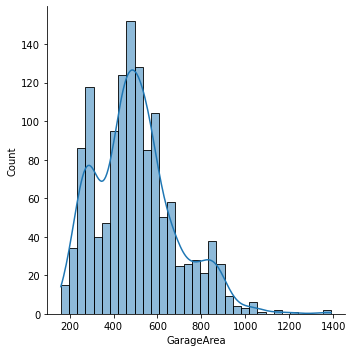

<Figure size 432x288 with 0 Axes>

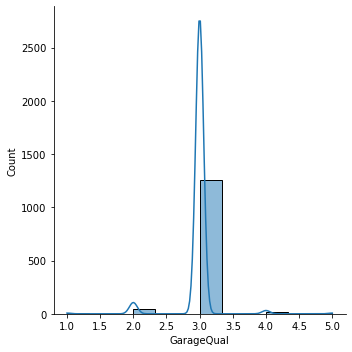

<Figure size 432x288 with 0 Axes>

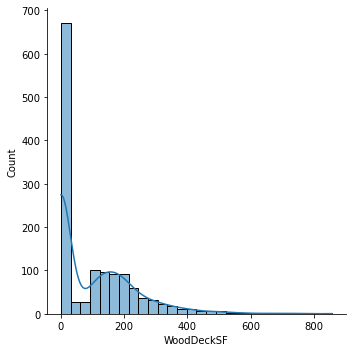

<Figure size 432x288 with 0 Axes>

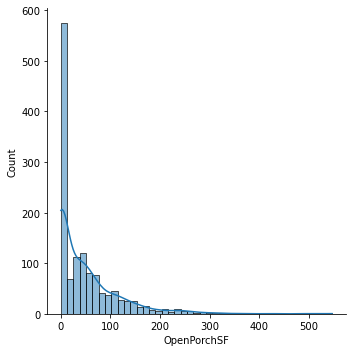

<Figure size 432x288 with 0 Axes>

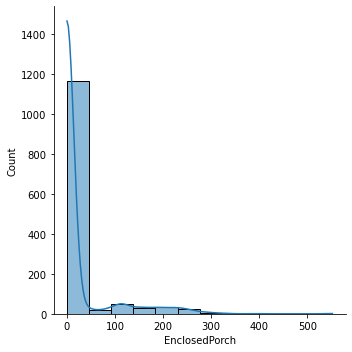

<Figure size 432x288 with 0 Axes>

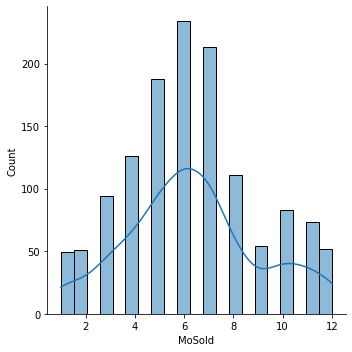

<Figure size 432x288 with 0 Axes>

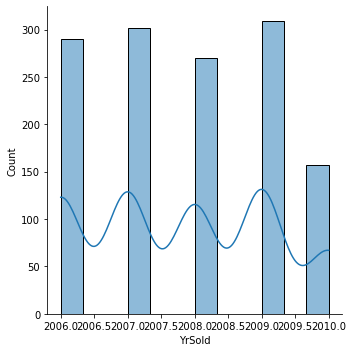

<Figure size 432x288 with 0 Axes>

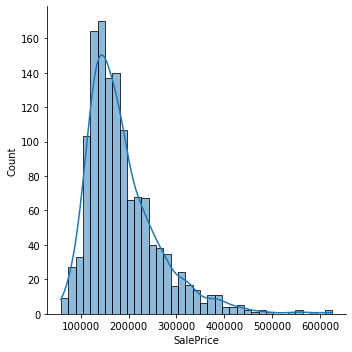

In [287]:
for column in to_plot:
    try:
        plt.figure()
        sns.displot(dfviz[column], kde=True)
    except:
        pass

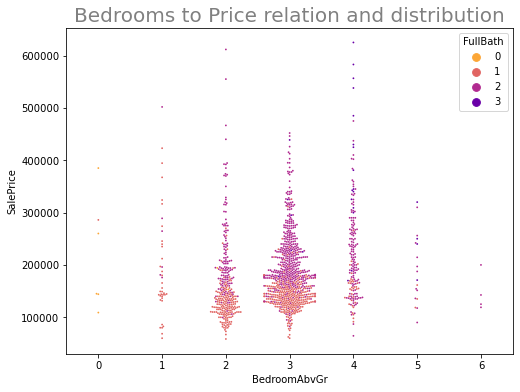

In [288]:
plt.figure(figsize=(8,6))
g = sns.swarmplot(x='BedroomAbvGr', y='SalePrice', data = dfviz, hue='FullBath', 
            palette='plasma_r', size=1.8)
plt.title('Bedrooms to Price relation and distribution', size=20, color='grey');

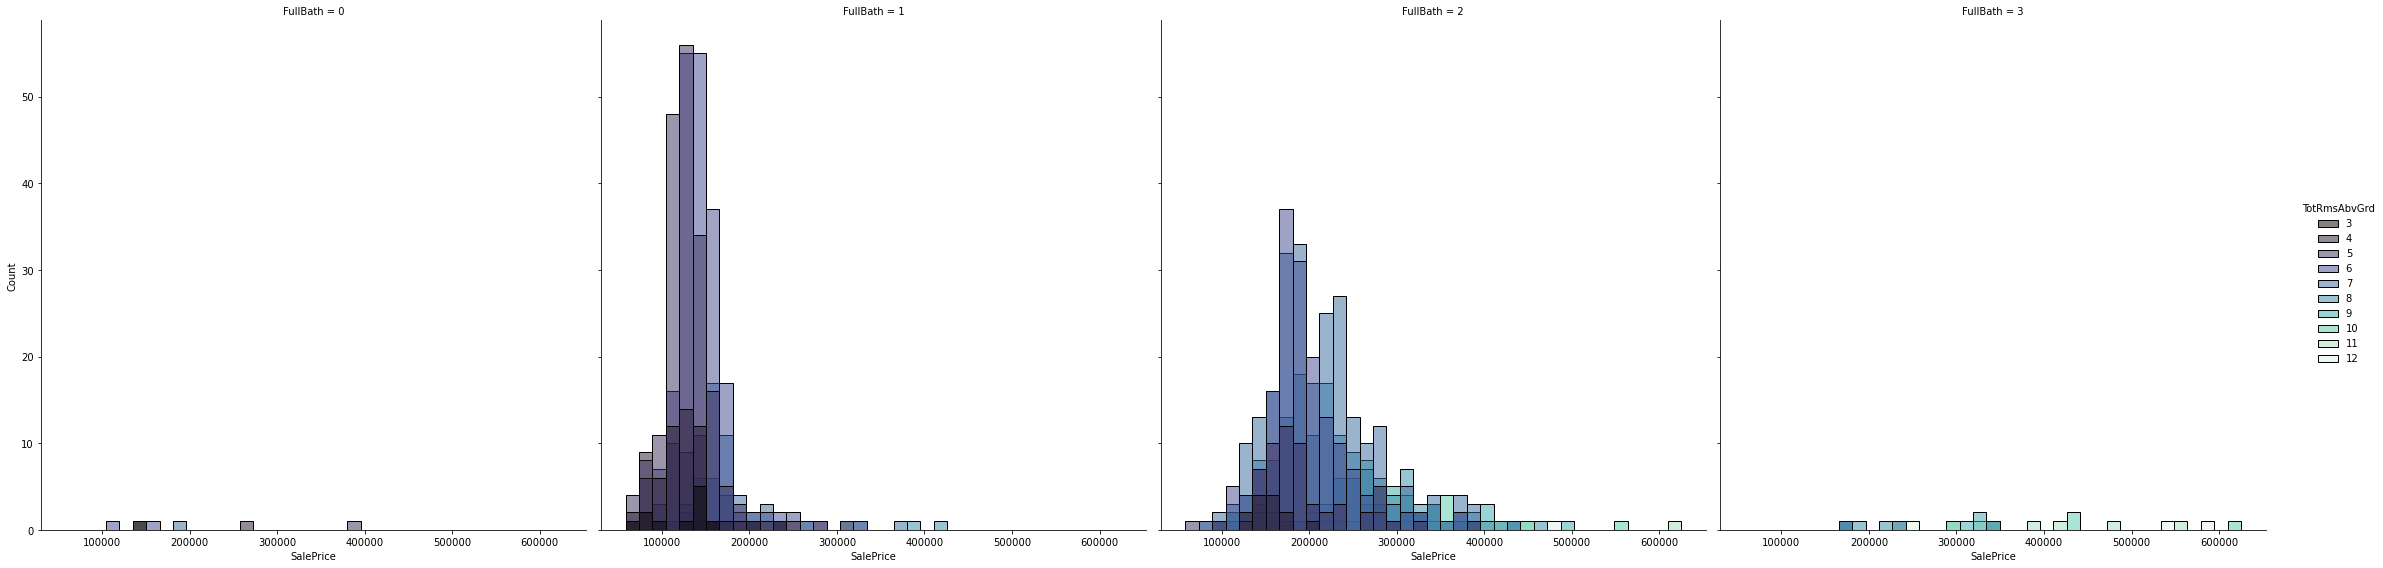

In [289]:
g = sns.displot(x='SalePrice', data = dfviz, hue='TotRmsAbvGrd', col='FullBath', 
            palette='mako', height=8);

In [290]:
# sns.pairplot(dfviz.iloc[:,:35], kind='reg')

In [291]:
# g = sns.PairGrid(dfviz.iloc[:,:50])
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.scatterplot);

In [292]:
#Copying for validation
dfvali = dftrain

In [293]:
"""    FEATURE CREATION    """

### MSZoning ###
#Creating a feature 'residential_den' to quantitatively record high, medium and low density.
#Potential introduction of error since we are assuming a relation/preference of low density to high.
dftrain.MSZoning.replace(['RH','RM','RL', 'RP', 'FV'], [2, 1, 0, 0, 0], inplace=True)


### LotShape ###
### LandContour ###
### Neighborhood : Physical lcoations within Ames city limits ###
### Condition1 : Proximity to various conditions ###
### BldgType : Type of dwelling ###
### HouseStyle : Style of dwelling ###
### RoofStyle : Type of roof ###
    #If model needs some bias, this is a potential drop.
### Exterior1st : Exterior covering on house ###
### Exterior2nd : Exterior covering on house (if more than one material) ###
### MasVnrType : Masonry veneer type ###
### Foundation : Type of foundation ###
### MoSold : Month Sold (MM) ###
#Produce and append dummies to convert hard-to-compare entries into logistical features
LotShapedumms = pd.get_dummies(dftrain.LotShape, prefix='LotShape')
LandContourdumms = pd.get_dummies(dftrain.LandContour, prefix='LandContour')
Neighborhooddumms = pd.get_dummies(dftrain.Neighborhood, prefix='nghood')
Condition1dumms = pd.get_dummies(dftrain.Condition1, prefix='con1')
BldgTypedumms = pd.get_dummies(dftrain.BldgType, prefix='BldgType')
HouseStyledumms = pd.get_dummies(dftrain.HouseStyle, prefix='HouseStyle')
RoofStyledumms = pd.get_dummies(dftrain.RoofStyle, prefix='RfStyle')
Ext1dumms = pd.get_dummies(dftrain.Exterior1st, prefix='Ext1')
Ext2dumms = pd.get_dummies(dftrain.Exterior2nd, prefix='Ext2')
MasVnrTypedumms = pd.get_dummies(dftrain.MasVnrType, prefix='MasVnrType')
Foundationdumms = pd.get_dummies(dftrain.Foundation, prefix='Found')
MoSolddumms = pd.get_dummies(dftrain.MoSold, prefix='MoSold')


### LotConfig ###
#Combine the entries for 'Frontage on 2' and '3 sides of the property' together as there are too few FR3 and the value of the data can be preserved as a 'multi frontage' property.
dftrain.LotConfig = dftrain.LotConfig.replace('FR3', 'FR2')
LotConfigdumms = pd.get_dummies(dftrain.LotConfig, prefix='LotConfig')


### BsmtFinType1 : Rating of basement finished area ###
#Assigning NBas for No Basement, to the current np.nan's. There's no conflict since it'll be used for dummies and dropped as k - 1 control
dftrain.BsmtFinType1.replace(np.nan, 'NBas', inplace=True)
BsmtFindumms = pd.get_dummies(dftrain.BsmtFinType1, prefix='BsmtFin')


### LandSlope ###
#Encode the entries in a quantitative way, higher value = more slope. While potentially introducing error, it preserves most of its relationship
dftrain.LandSlope.replace(['Gtl','Mod','Sev'], [0, 1, 2], inplace=True)

### GarageType : Garage location ###
#Assiging categorical value to 'no garage', and turning to dummies. 
dftrain.GarageType.replace(np.nan, 'NoGar', inplace=True)
GarageTypedumms = pd.get_dummies(dftrain.GarageType, prefix='Garage')


### GarageYrBlt : Year garage was built ###
#Dropping because of the pontential error from date data and np.nans. Value from garages is recorded elsewhere
dftrain.drop('GarageYrBlt', axis=1, inplace=True)


### GarageFinish : Interior finish of the garage ###
#Assiging categorical value to 'no garage', and turning to dummies. 
dftrain.GarageFinish.replace(np.nan, 'NoGar', inplace=True)
GarageFinishdumms = pd.get_dummies(dftrain.GarageFinish, prefix='GarFin')


### YrSold : Year Sold (YYYY) ###
#Creating a feature that tracks the age of the property by subtracting the year built from year sold.
dftrain['Prop_Age'] =  dftrain.YrSold - dftrain.YearBuilt


""" CLEAN UP """                                              
        
#Dropping all the raw variables that were converted to features
dftrain.drop(['MSSubClass', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
             'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 
              'MasVnrType', 'Foundation', 'BsmtFinType1', 'GarageType', 'GarageFinish',
              'MoSold', 'YearBuilt', 'YrSold'], axis=1, inplace=True)

#Concatenating all dummies into DataFrame
dftrain = pd.concat([dftrain, LotShapedumms, LandContourdumms, LotConfigdumms, Neighborhooddumms, 
                    Condition1dumms, BldgTypedumms, HouseStyledumms, RoofStyledumms, Ext1dumms, 
                     Ext2dumms, MasVnrTypedumms, Foundationdumms, BsmtFindumms, GarageTypedumms,
                    GarageFinishdumms, MoSolddumms], axis=1)

#Dropping one variable from every dummy created in accordance with the k - 1 principle. 
#Dropping highest response dummy, if no common sense alternative exists (i.e. one of the responses can be interpreted as a zero)
dftrain.drop(['LotShape_Reg', 'LandContour_Lvl', 'LotConfig_Inside', 'nghood_Blueste', 'con1_Norm',
              'BldgType_1Fam', 'HouseStyle_1Story', 'RfStyle_Gable', 'Ext1_VinylSd', 'Ext2_VinylSd',
             'MasVnrType_None', 'Found_PConc', 'MoSold_1'], axis=1, inplace=True)


In [302]:
dfvali.head()

,MSZoning,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Prop_Age
0,0,65.0,8450,0,7,5,2003,4,3,4,3,1,706,856,5,856,854,1710,1,2,1,3,1,4,8,0,0,2,548,3,3,0,61,0,208500,5
1,0,80.0,9600,0,6,8,1976,3,3,4,3,4,978,1262,5,1262,0,1262,0,2,0,3,1,3,6,1,3,2,460,3,3,298,0,0,181500,31
2,0,68.0,11250,0,7,5,2002,4,3,4,3,2,486,920,5,920,866,1786,1,2,1,3,1,4,6,1,3,2,608,3,3,0,42,0,223500,7
3,0,60.0,9550,0,7,5,1970,3,3,3,4,1,216,756,4,961,756,1717,1,1,0,3,1,4,7,1,4,3,642,3,3,0,35,272,140000,91
4,0,84.0,14260,0,8,5,2000,4,3,4,3,3,655,1145,5,1145,1053,2198,1,2,1,4,1,4,9,1,3,3,836,3,3,192,84,0,250000,8


AttributeError: 'DataFrame' object has no attribute 'YearBuilt'

In [295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
dfvif = dfvali.drop(['SalePrice', '1stFlrSF','GarageCond', 'ExterCond'], axis=1)
calc_vif(dfvif)

,variables,VIF
0,MSZoning,1.729281
1,LotFrontage,18.908325
2,LotArea,3.158511
3,LandSlope,1.517669
4,OverallQual,86.392598
5,OverallCond,42.954804
6,YearRemodAdd,528.872598
7,ExterQual,112.219668
8,BsmtQual,88.471394
9,BsmtCond,131.819937


In [276]:
dfvali.corr()

,MSZoning,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Prop_Age
MSZoning,1.000000,-0.320592,-0.162742,-0.049394,-0.219845,0.121115,-0.196055,-0.211868,0.057786,-0.245511,-0.123254,-0.124098,-0.181105,-0.278204,-0.152224,-0.215669,-0.268193,0.041260,-0.158535,-0.114616,-0.045892,-0.205900,-0.141682,-0.115810,0.153589,-0.211054,-0.143086,-0.205738,-0.205113,-0.216065,-0.224556,-0.141820,-0.135047,-0.121214,-0.076862,0.206112,-0.303906,0.393699
LotFrontage,-0.320592,1.000000,0.265130,0.042113,0.206186,-0.053322,0.062662,0.146418,-0.008475,0.145615,0.045751,0.145838,0.129237,0.318767,0.083218,0.065863,0.346321,0.049169,0.305379,0.073695,0.000928,0.161639,0.029839,0.255964,0.015616,0.143626,0.301694,0.208082,0.213352,0.281950,0.312944,0.057013,0.038635,0.068468,0.120391,0.029844,0.345124,-0.099674
LotArea,-0.162742,0.265130,1.000000,0.471373,0.072089,0.003085,-0.006920,0.023903,0.013111,0.057600,0.021845,0.224933,0.168293,0.225027,-0.011951,0.040095,0.252823,0.035806,0.222874,0.148446,0.047343,0.106175,-0.001584,0.118630,-0.010148,0.039145,0.167067,0.251305,0.166151,0.132880,0.145620,0.028598,0.016771,0.164491,0.061320,-0.014384,0.261869,0.012912
LandSlope,-0.049394,0.042113,0.471373,1.000000,-0.044482,0.034229,-0.049272,-0.070939,-0.021669,-0.013724,0.055231,0.273628,0.135070,0.052287,-0.058940,0.024475,0.089894,0.003397,0.073184,0.130648,0.082152,-0.028518,-0.003573,-0.032176,-0.021862,-0.024300,-0.018637,0.147812,0.065334,0.010577,0.014789,0.011652,-0.022744,0.113101,-0.023099,-0.019301,0.074708,0.066748
OverallQual,-0.219845,0.206186,0.072089,-0.044482,1.000000,-0.177136,0.543163,0.719290,-0.046791,0.667708,0.151934,0.260568,0.159472,0.495543,0.445100,0.181192,0.461690,0.264154,0.581181,0.072374,-0.076457,0.568389,0.239948,0.065867,-0.139501,0.661985,0.430391,0.362133,0.467332,0.594050,0.534558,0.154700,0.119440,0.207191,0.293549,-0.109493,0.792269,-0.566925
OverallCond,0.121115,-0.053322,0.003085,0.034229,-0.177136,1.000000,0.027075,-0.182368,0.382947,-0.320809,0.106362,-0.089856,-0.062174,-0.245293,-0.072772,0.054072,-0.155785,0.012835,-0.102158,-0.069670,0.118690,-0.223957,-0.076336,0.015731,-0.074380,-0.072063,-0.069702,-0.035955,-0.081353,-0.253061,-0.205997,0.034294,0.016949,-0.015212,-0.058989,0.075321,-0.123208,0.429050
YearRemodAdd,-0.196055,0.062662,-0.006920,-0.049272,0.543163,0.027075,1.000000,0.594497,0.047409,0.574575,0.142495,0.203163,0.083792,0.263282,0.547788,0.303856,0.231901,0.115578,0.271896,0.091767,-0.029551,0.453682,0.165246,-0.087224,-0.161231,0.634314,0.165660,0.077395,0.166637,0.460377,0.393410,0.135514,0.108540,0.195739,0.225991,-0.212082,0.511164,-0.612135
ExterQual,-0.211868,0.146418,0.023903,-0.070939,0.719290,-0.182368,0.594497,1.000000,-0.030163,0.640842,0.133803,0.228114,0.141144,0.450364,0.521144,0.192054,0.375306,0.158116,0.421545,0.096308,-0.076508,0.488714,0.161552,-0.031175,-0.127592,0.706878,0.300689,0.204830,0.329656,0.523261,0.476627,0.102211,0.083607,0.179969,0.280391,-0.155864,0.681472,-0.591452
ExterCond,0.057786,-0.008475,0.013111,-0.021669,-0.046791,0.382947,0.047409,-0.030163,1.000000,-0.118627,0.145100,-0.020546,0.022756,-0.056225,0.032259,0.160690,-0.001372,0.022305,0.020862,0.027183,0.090186,-0.012379,-0.051137,0.034674,-0.034905,0.010303,0.016815,0.014091,-0.016769,-0.071147,-0.029457,0.082203,0.104893,0.035991,0.066790,0.046791,-0.015312,0.156893
BsmtQual,-0.245511,0.145615,0.057600,-0.013724,0.667708,-0.320809,0.574575,0.640842,-0.118627,1.000000,0.192085,0.314371,0.237622,0.444230,0.421929,0.235387,0.351313,0.123183,0.368246,0.166213,-0.065592,0.505112,0.187245,-0.067262,-0.136078,0.563163,0.238502,0.209177,0.318702,0.558517,0.

In [190]:
#Get the data ready for modeling
y = dftrain.SalePrice
X = dftrain.drop(['SalePrice'], axis=1)

In [191]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # df = independent variables, y = dependent variables, 0.3 = 30%
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(928, 155) (928,)
(399, 155) (399,)


In [38]:
dftrain.tail()


,Id,MSZoning,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,Prop_Age,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,nghood_Blmngtn,nghood_BrDale,nghood_BrkSide,nghood_ClearCr,nghood_CollgCr,nghood_Crawfor,nghood_Edwards,nghood_Gilbert,nghood_IDOTRR,nghood_MeadowV,nghood_Mitchel,nghood_NAmes,nghood_NPkVill,nghood_NWAmes,nghood_NoRidge,nghood_NridgHt,nghood_OldTown,nghood_SWISU,nghood_Sawyer,nghood_SawyerW,nghood_Somerst,nghood_StoneBr,nghood_Timber,nghood_Veenker,con1_Artery,con1_Feedr,con1_PosA,con1_PosN,con1_RRAe,con1_RRAn,con1_RRNe,con1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RfStyle_Flat,RfStyle_Gambrel,RfStyle_Hip,RfStyle_Mansard,RfStyle_Shed,Ext1_AsbShng,Ext1_AsphShn,Ext1_BrkComm,Ext1_BrkFace,Ext1_CBlock,Ext1_CemntBd,Ext1_HdBoard,Ext1_ImStucc,Ext1_MetalSd,Ext1_Plywood,Ext1_Stone,Ext1_Stucco,Ext1_Wd Sdng,Ext1_WdShing,Ext2_AsbShng,Ext2_AsphShn,Ext2_Brk Cmn,Ext2_BrkFace,Ext2_CBlock,Ext2_CmentBd,Ext2_HdBoard,Ext2_ImStucc,Ext2_MetalSd,Ext2_Other,Ext2_Plywood,Ext2_Stone,Ext2_Stucco,Ext2_Wd Sdng,Ext2_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Found_BrkTil,Found_CBlock,Found_Slab,Found_Stone,Found_Wood,BsmtFin_ALQ,BsmtFin_BLQ,BsmtFin_GLQ,BsmtFin_LwQ,BsmtFin_Rec,BsmtFin_Unf,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,GarFin_Fin,GarFin_RFn,GarFin_Unf,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12
1441,1456,0,62.0,7917,0,6,5,2000,0.0,3,3,4,3,1,0,0,953,5,1,4.0,953,694,1647,0,0,2,1,3,1,3,7,0,1,3,2,460,3,3,0,40,0,175000,-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1442,1457,0,85.0,13175,0,6,6,1988,119.0,3,3,4,3,1,790,163,1542,3,1,4.0,2073,0,2073,1,0,2,0,3,1,3,7,1,2,3,2,500,3,3,349,0,0,210000,-32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1443,1458,0,66.0,9042,0,7,9,2006,0.0,5,4,3,4,1,275,0,1152,5,1,4.0,1188,1152,2340,0,0,2,0,4,1,4,9,0,2,4,1,252,3,3,0,60,0,266500,-69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1444,1459,0,68.0,9717,0,5,6,1996,0.0,3,3,3,3,2,49,1029,1078,4,1,3.0,1078,0,1078,1,0,1,0,2,1,4,5,0,0,0,1,240,3,3,366,0,112,142125,-60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1445,1460,0,75.0,9937,0,5,6,1965,0.0,4,3,3,3,1,830,290,1256,4,1,4.0,1256,0,1256,1,0,1,1,3,1,3,6,0,0,0,1,276,3,3,736,68,0,147500,-43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
